## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [8]:
rows=df.shape[0]
rows

294478

c. The number of unique users in the dataset.

In [69]:
#Unique user_id can give us unique users in the dataset
unique_users=len(df.user_id.unique())
unique_users

290584

d. The proportion of users converted.

In [7]:
#The proportion of converted users can be calculated by finding the mean.
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [42]:
newPage_treat=df[(df['landing_page']=='new_page') != (df['group']=='treatment')]
newPage_treat.shape[0]

3893

f. Do any of the rows have missing values?

In [71]:
# Using the .isna() function, we can see that there is no missing value in any of the column.
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [45]:
df2=df[(df['group'] == 'treatment')!= (df['landing_page'] == 'old_page')]

In [46]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [72]:
unique_users2=len(df2.user_id.unique())
unique_users2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [56]:
repeatedId=(df2.user_id.value_counts()==2).index[0]
repeatedId

773192

c. What is the row information for the repeat **user_id**? 

In [58]:
df2[df2.user_id==repeatedId]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [59]:
#Since we have duplicates, I can drop the later appearance of the Id
df2=df2.drop(2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [62]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [67]:
df2[df2.group=='control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [68]:
df2[df2.group=='treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [77]:
#Probability of landing on new page is number of time a user landed on new page 
#divided by total number of visits.
new_page_rows=len(df2.query("landing_page=='new_page'"))
new_page_rows/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Here, `P(converted|control)=0.120 `and` P(converted|treatment)=0.1188`

The conversion rates are almost similar for both the pages(new and old), so **we cannot say that the new page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>**Null Hypothesis, $H_{o}$**: **$p_{new}$** - **$p_{old}$** <=0

>**Alternate Hypothesis, $H_{1}$**: **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [78]:
# Since we are checking for null, the convert rate will be same for both the pages.
PnConv=df2.converted.mean()
PnConv

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [79]:
# Since we are checking for null, the convert rate will be same for both the pages.
PoConv=df2.converted.mean()
PoConv

0.11959708724499628

c. What is $n_{new}$?

In [80]:
n_new = len(df2[df2['group']=='treatment'])
n_new

145310

d. What is $n_{old}$?

In [82]:
n_old=len(df2[df2['group']=='control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [130]:
#We can use the binomial funtion to achieve this
new_page_converted= np.random.binomial(1, PnConv, n_new)
new_page_converted.mean()

0.120686807514968

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [129]:
old_page_converted= np.random.binomial(1, PoConv, n_old)
old_page_converted.mean()

0.1196291146385451

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [131]:
#Difference between the simulations
new_page_converted.mean() - old_page_converted.mean()

0.0010576928764229054

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [132]:
#Iterating over the queries for 10,000 times and storing them in p_diffs
p_diffs=[]
for _ in range(10000):
    new_page_converted= np.random.binomial(1, PnConv, n_new)
    old_page_converted= np.random.binomial(1, PoConv, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

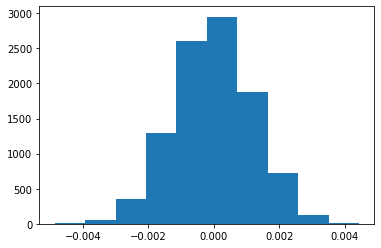

In [133]:
#Histogram to display the p_diffs
plt.hist(p_diffs)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [137]:
#Changing the p_diffs into array to make it more useful
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
#Calculating new values
p_new = df2[df2.group == "treatment"].converted.mean()
p_old = df2[df2.group == "control"].converted.mean()
obs_diff = p_new - p_old
#Finding the proportion greater than the difference
(null_vals > obs_diff).mean()

0.9073

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>The value calculated in part j is called **p-value**. This value helps in deciding whether to pass or fail the Null Hypothesis. Since the value is more than the alpha value(0.05), we failed to reject the Null Hypothesis. this means the **Old page performs better than the New page**.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [139]:
import statsmodels.api as sm

convert_old = sum(df2.query("landing_page == 'old_page'").converted)
convert_new = sum(df2.query("landing_page == 'new_page'").converted)
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

/home/jaintanmay121/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [140]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old])
z_score, p_value

(-1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [141]:
from scipy.stats import norm

print(norm.cdf(z_score))        # Tells us significance of z-score

print(norm.ppf(1-(0.05/2)))     # Tells us the critical value at 95% confidence

0.09494168724097551
1.959963984540054


> Since the p-value(0.18988337448195103) is greater than 0.05, and z-score(-1.3109241984234394) does not exceed the critical value of -1.959963984540054, we fail to reject the null hypothesis which means that new page conversion rate is higher than the old rate.
Since they differ, I agree with the findings in parts **j** and **k**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>We will use **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [147]:
#Making Dummy variables for landing page and dropping the unneeded column
df2[['ab_page', 'page']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop('page', axis = 1)
#Creating intercept column
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [152]:
#Creating the logistic regression model
lm = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [153]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:53:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> As can be seen from the model summary, p-value associated with ab_page is **0.19**. This differs from the p-value in Part II because of the different Null and Hypothesis of the two parts.

>Hypothesis in Part II ::
>
>$H_{o}$ : $p_{new}$ - $p_{old}$ <= 0 
>
>$H_{1}$ : $p_{new}$ - $p_{old}$ > 0

>Hypothesis in Part III ::
>
>$H_{o}$ : $p_{new}$ - $p_{old}$ = 0
>
>$H_{1}$ : $p_{new}$ - $p_{old}$ != 0



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Adding more factors into the regression model might help us better understand the outcomes and yeild accurate predictions. 
However, it is also possible to cause multicollinearity if the factors have strong relationship with each other.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [168]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [169]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [170]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [171]:
#Creating Dummy variables
df_new[['UK','US', 'CA']] = pd.get_dummies(df_new['country'])[['UK','US','CA']]
df_new=df_new.drop(['CA','country'], axis=1)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [175]:
# Fit Linear Model And Obtain the Results
logreg = sm.Logit(df_new['converted'],df_new[['intercept','UK','US','ab_page']])
results = logreg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:               2.323e-05
Time:                        16:14:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

As per the above A/B testing, there is no significant difference between the old and new page. The conversion rates are not significant enough. So, we accept the Null Hypothesis and reject the Alternate Hypothesis. They should not launch the new page.

### Limitations: 
These results are based on the provided data. There might be error in data leading to wrongful testing.